In [14]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.io
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mat_path = (r"C:\Users\estel\OneDrive\Escritorio\NEUROCIENCIAS\QUINTO SEMESTRE\MODELOS\Neurociencias-2025-1\BCT\BCT\2019_03_03_BCT\data_and_demos\Coactivation_matrix.mat")
datos = scipy.io.loadmat(mat_path)

In [4]:
# para los datos de 'Coactivation_matrix.mat', filtre la matriz para obtener los valores > 0.2

mat_adj = datos['Coactivation_matrix'] 
mat_adj[mat_adj <= 0.2] = 0 

In [5]:
# con el nuevo arreglo muestre los nodos y vértices del grafo

G = nx.from_numpy_array(mat_adj)
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print("el número de nodos es: ", num_nodes)
print("el número de aristas es: ", num_edges)

el número de nodos es:  638
el número de aristas es:  186


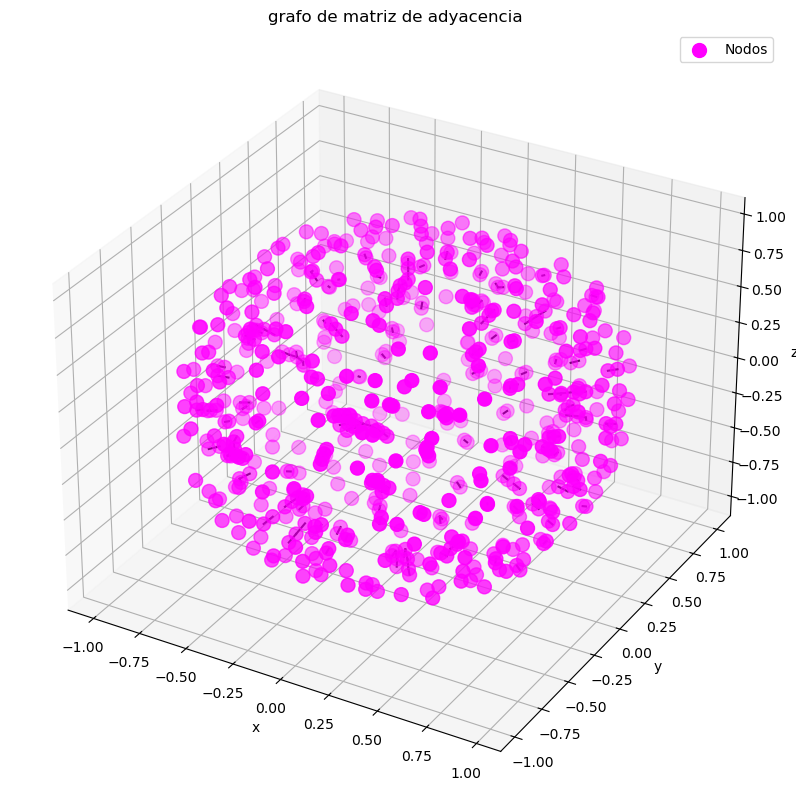

In [17]:
pos_3d = nx.spring_layout(G, dim = 3, seed = 42)
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection="3d")

x_nodes = [pos_3d[node][0] for node in G.nodes()]
y_nodes = [pos_3d[node][1] for node in G.nodes()]
z_nodes = [pos_3d[node][2] for node in G.nodes()]

ax.scatter(x_nodes, y_nodes, z_nodes, c = "magenta", s = 100, label = "nodes")

for edge in G.edges():
    x_edges = [pos_3d[edge[0]][0], pos_3d[edge[1]][0]]
    y_edges = [pos_3d[edge[0]][1], pos_3d[edge[1]][1]]
    z_edges = [pos_3d[edge[0]][2], pos_3d[edge[1]][2]]
    ax.plot(x_edges, y_edges, z_edges, c="black")

ax.set_title("grafo de matriz de adyacencia")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()
plt.show()